<a href="https://colab.research.google.com/github/Cycadophyta/genomic-data-science/blob/main/algorithms_for_dna_sequencing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A collection of functions from the Algorithms for DNA Sequencing Module

In [ ]:
def reverse_complement(sequence):
    '''Returns the reverse complement of a sequence.'''
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    reverse_complement = ''
    for base in sequence:
        reverse_complement = complement[base] + reverse_complement
    return reverse_complement


def read_genome(filename):
    '''Reads a sequence from a genome file.'''
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome


def read_fastq(filename):
    ''''Reads a FASTQ file.'''
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities


def naive(p, t):
    '''Finds the positions of all exact matches of p in t.'''
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                match = False
                break
        if match:
          occurrences.append(i)
    return occurrences


def generate_reads(genome, numReads, readLen):
    ''' Generate reads from random positions in the given genome. '''
    reads = []
    for _ in range(numReads):
        start = random.randint(0, len(genome)-readLen) - 1
        reads.append(genome[start : start+readLen])
    return reads

In [ ]:
# Following line downloads FASTA file containing the lambda phage reference genome
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa


## Programming homework 1

First, implement a version of the naive exact matching algorithm that is strand-aware. That is, instead of looking only for occurrences of P in T, additionally look for occurrences of thereverse complement of P in T. If P is ACT, your function should find occurrences of both ACTand its reverse complement AGT in T.

If P and its reverse complement are identical (e.g. AACGTT), then a given match offset should be reported only once. So if your new function is called naive_with_rc, then the old naivefunction and your new naive_with_rc function should return the same results when P equals its reverse complement.

Hint: See this notebook for a few examples you can use to test your naive_with_rc function. http://nbviewer.ipython.org/github/BenLangmead/ads1-hw-examples/blob/master/hw1_naive_with_rc.ipynb

Next, download and parse the lambda virus genome, at: https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

In [ ]:
def naive_with_rc(pattern, text):
    '''
    Finds the positions of all exact matches of pattern and reverse
    complement in text.
    '''
    occurrences = []
    rev_pattern = reverse_complement(pattern)
    if pattern == rev_pattern:
        for i in range(len(text) - len(pattern) + 1):
            match = True
            for j in range(len(pattern)):
                if text[i+j] != pattern[j]:
                    match = False
                    break
            if match:
                occurrences.append(i)
    else:
        for i in range(len(text) - len(pattern) + 1):
            match = True
            rev_match = True
            for j in range(len(pattern)):
                if text[i+j] != pattern[j]:
                    match = False
                    break
            for k in range(len(rev_pattern)):
                if text[i+k] != rev_pattern[k]:
                    rev_match = False
                    break
            if match or rev_match:
                occurrences.append(i)
    return occurrences

In [ ]:
# Example 1
p = 'CCC'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CCC' + ten_as + 'GGG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)


# Example 2
p = 'CGCG'
t = ten_as + 'CGCG' + ten_as + 'CGCG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)


# Example 3
# Phi-X genome
#!wget http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa

def read_genome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome
phix_genome = read_genome('phix.fa')
occurrences = naive_with_rc('ATTA', phix_genome)
print('offset of leftmost occurrence: %d' % min(occurrences))
print('# occurrences: %d' % len(occurrences))


# Example 4
p = 'CGCT'
t = ten_as + p + ten_as + reverse_complement(p) + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

[10, 23]
[10, 24]
offset of leftmost occurrence: 62
# occurrences: 60
[10, 24]


In [ ]:
#!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

lambda_genome = read_genome('lambda_virus.fa')
pattern_1 = 'AGGT'
pattern_2 = 'TTAA'
pattern_3 = 'ACTAAGT'
pattern_4 = 'AGTCGA'

occurences = naive_with_rc(pattern_1, lambda_genome)
print(f'{pattern_1} appears {len(occurences)} times')

occurences = naive_with_rc(pattern_2, lambda_genome)
print(f'{pattern_2} appears {len(occurences)} times')

occurences = naive_with_rc(pattern_3, lambda_genome)
print(f'The first occurence of {pattern_3} is at offset {min(occurences)}')

occurences = naive_with_rc(pattern_4, lambda_genome)
print(f'The first occurence of {pattern_3} is at offset {min(occurences)}')

AGGT appears 306 times
TTAA appears 195 times
The first occurence of ACTAAGT is at offset 26028
The first occurence of ACTAAGT is at offset 450


In [ ]:
def naive_2mm(pattern, text):
    '''
    Finds the positions of all matches with up to two mismatches 
    of pattern in text.
    '''
    occurrences = []
    for i in range(len(text) - len(pattern) + 1):
        mismatch = 0
        for j in range(len(pattern)):
            if text[i+j] != pattern[j]:
                mismatch += 1
                if mismatch > 2:
                    break
        if mismatch <= 2:
            occurrences.append(i)
    return occurrences

In [ ]:
# Example 1
p = 'CTGT'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CTGT' + ten_as + 'CTTT' + ten_as + 'CGGG' + ten_as
occurrences = naive_2mm(p, t)
print(occurrences)


# Example 2
# Phi-X genome
#!wget http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa
phix_genome = read_genome('phix.fa')
occurrences = naive_2mm('GATTACA', phix_genome)
print('offset of leftmost occurrence: %d' % min(occurrences))
print('# occurrences: %d' % len(occurrences))

[10, 24, 38]
offset of leftmost occurrence: 10
# occurrences: 79


In [ ]:
lambda_genome = read_genome('lambda_virus.fa')
pattern_1 = 'TTCAAGCC'
pattern_2 = 'AGGAGGTT'

occurences = naive_2mm(pattern_1, lambda_genome)
print(f'{pattern_1} appears {len(occurences)} times')

occurences = naive_2mm(pattern_2, lambda_genome)
print(f'The first occurence of {pattern_2} is at offset {min(occurences)}')

TTCAAGCC appears 191 times
The first occurence of AGGAGGTT is at offset 49


Ns per read


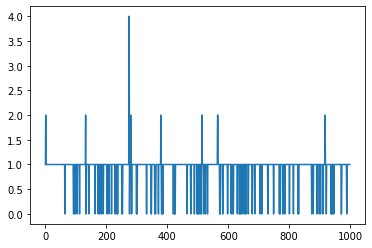

Read 275 has 4 Ns

Frequency of qualities


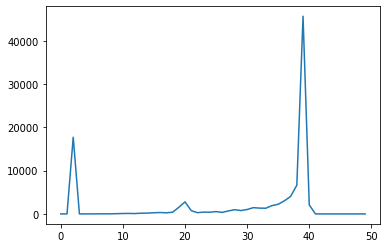


Frequency of offset with lowest quality per read.


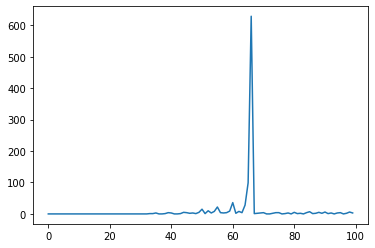

Position 66 had the greatest frequency of low quality reads.

Number of Ns at each position.


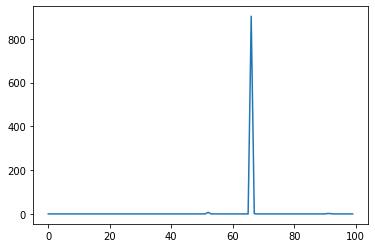

Position 66 had 903 Ns


In [ ]:
import matplotlib.pyplot as plt
import collections

#!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

sequences, qualities = read_fastq('ERR037900_1.first1000.fastq')

n_count = []
for seq in sequences:
    n_count.append(seq.count('N'))

print('Ns per read')
plt.plot(range(len(sequences)), n_count)
plt.show()

print(f'Read {n_count.index(max(n_count))} has {max(n_count)} Ns')

def phred33ToQ(qual):
    return ord(qual) - 33

def createHist(qualityStrings):
    # Create a histogram of quality scores
    hist = [0]*50
    for read in qualityStrings:
        for phred in read:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(qualities)

print()
print('Frequency of qualities')
plt.plot(range(len(h)), h)
plt.show()

min_quality = []
index = []
for read in qualities:
    quality = []
    for phred in read:
        quality.append(phred33ToQ(phred))
    min_quality.append(min(quality))
    index.append(quality.index(min(quality)))

hist = [0]*len(qualities[0])
for i, val in enumerate(index):
    hist[val] += 1

print()
print('Frequency of offset with lowest quality per read.')
plt.plot(range(len(hist)), hist)
plt.show()
print(f'Position {hist.index(max(hist))} had the greatest frequency of low quality reads.')

Ns = [0]* len(sequences[0])
for read in sequences:
    for i, char in enumerate(read):
        if char == 'N':
            Ns[i] += 1

print()
print('Number of Ns at each position.')
plt.plot(range(len(Ns)), Ns)
plt.show()
print(f'Position {Ns.index(max(Ns))} had {max(Ns)} Ns')